#ORIE 5530 HW3 Maxwell Wulff, Konstantinos Ntalis

### Question 1

#### Part (a)

In [0]:
import numpy as np
import random

P = np.array([[0.4,0.38,0.22],[0.12,0.7,0.18],[0.2,0.5,0.3]])


def markov_chain(P, n, starting_state):

  states = [starting_state]
  current_state = starting_state
  
  for i in range(1, n):
    if current_state == 1:
      next_state = np.random.choice([1,2,3], p = P[0,:])
      states.append(next_state)
    if current_state == 2:
      next_state = np.random.choice([1,2,3], p = P[1,:])
      states.append(next_state)
    if current_state == 3:
      next_state = np.random.choice([1,2,3], p = P[2,:])
      states.append(next_state)
    current_state = states[i]

  return states

In [123]:
# approximate time spent in each state

t = markov_chain(P,100,1)

print(t.count(1))
print(t.count(2))
print(t.count(3))

24
63
13


Text(0, 0.5, 'State')

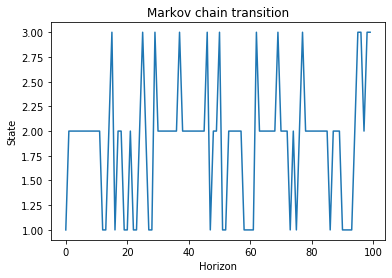

In [124]:
# plotting the states

import matplotlib.pyplot as plt

plt.plot(t)
plt.title('Markov chain transition')
plt.xlabel('Horizon')
plt.ylabel('State')

#### Part (b)

In [0]:
X = markov_chain(P, 1000, 1)

long_term = (1/1000)*np.sum(X)

beta = [0.9**k for k in range(1000)]

disc = np.sum((np.array(X)**2)*np.array(beta))

In [0]:
print(long_term)
print(disc)

2.065
41.67072378239586


#### Part (c)

In [0]:
n = 1000
beta = [0.9**k for k in range(n)]
long_term = []
disc = []

for i in range(1000):
  X = markov_chain(P, n, 1)
  long_term.append((1/n)*np.sum(X))
  disc.append(np.sum((np.array(X)**2)*np.array(beta)))

long_term_mean = np.mean(long_term)
disc_mean = np.mean(disc)

In [0]:
print(long_term_mean)
print(disc_mean)

2.0213449999999997
40.95547743501839


#### Part (d)

Using the formula from the notes we have

$$\mathbb{E}[\sum_{k=0}^n\beta^kf(X_k)|X_0=1]=\sum_{k=0}^n\beta^k\sum_{y=1}^3f(y)[P^k]_{xy}$$

where $f(y)=y^2$. We can then find the value of this for $n=1000$, using the code below.

In [118]:
s = 0
for k in range(1000):
  A = np.linalg.matrix_power(P, k)
  s += (0.9**k)*(1*A[0,0]+4*A[0,1]+9*A[0,2])

print(s)

40.77818435686949


As expected, it is pretty close to the result found in (c).

### Question 2

#### Part (a)

At any point in time when the game is still going, player 1 is either tied with player 1, wins by 1 or loses by 1. In all other scenarios, the game has ended as we have a difference of more than two either in favour of player 1 or player 2. So let's denote with $p_{i}$ the probability that player 1 wins if the game is in state $i$. Here $i \in \{-1,0,1,2,-2\}$. Obviously $p_{2}=1$ and $p_{-2}=0$.

$$\begin{align}
p_{1} & = p + p_{0} (1-p) \\
p_{0} & = p_{1} p + p_{-1}(1-p) \\
p_{-1} & = p_{0}p \\ 
\end{align}
$$

This is a $3x3$ system that can be easily solved. Since we are interested in $p_{0}$, i.e. the start of the game, then:

$$p_{0}=\frac{p^2}{1-2p(1-p)}$$

#### Part (b)

We can condition the expectation on what happens in the first two games. The game can end in the first two games if all of the games are won by one of the players. If each one gets a win, we can write the expectation recursively as follows


$$E(X)= 2p^2+2(1-p)^2+2p(1-p)\big(2+E(x)\big)$$

Note here that if they both get a win in the first two games, then we have played 2 games and we need $E(x)$ more. Also since the event of splitting the wins can occur in two ways, we need this extra factor of two. Rearranging, we get


$$E(x)=\frac{2}{1-2p(1-p)}$$

### Question 3

When we are at 0, then obviously $E(T_1)=1$. Then for all the other nodes the reasoning is the following. With probability $1/2$ we only need one step and with probability $1/2$ we move one node back and hence we need $E(T_{i-1})+E(T{i})$. But note that to do that, we have taken one extra step. Therefore in total we have


$$E(T_i)=\frac{1}{2}+\frac{1}{2}\big(1+E(T_{i-1})+E(T_i)\big)$$


We therefore get


$$E(T_i)-E(T_{i-1})=2$$


Then by using this recursively to replace $E(T_{i-1})$, we eventually get


$$E(T_i)-E(T_1)=2(i+1)$$


and hence


$$E(T_i)=2i-1$$


Finally, to get the desired result we simply evaluate


$$\sum_{i=1}^nE(T_i)=\sum_{i=1}^n(2i-1)=n^2$$